# Credit Scoring PD(probability of default) Model

# Pre-Processing

In [1]:
# Kitabxanalari oxumaq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 700)
pd.options.display.float_format = '{:.3f}'.format

In [2]:
# datani oxumaq
credit_score_data = pd.read_csv(r'C:\Users\Shahbaz\Desktop\socool\credit_score.csv')
data = credit_score_data.copy()

In [3]:
data.head(2)

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
0,0x1602,CUS0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.120,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.000,11.270,4.000,809.980,26.823,No,49.575,80.415,HighspentSmallvaluepayments,312.494,Good
1,0x1603,CUS0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.120,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.270,4.000,809.980,31.945,No,49.575,118.280,LowspentLargevaluepayments,284.629,Good


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87495 entries, 0 to 87494
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      87495 non-null  object 
 1   CustomerID              87495 non-null  object 
 2   Month                   87495 non-null  object 
 3   Name                    78779 non-null  object 
 4   Age                     87495 non-null  int64  
 5   SSN                     87495 non-null  object 
 6   Occupation              81317 non-null  object 
 7   AnnualIncome            87495 non-null  float64
 8   MonthlyInhandSalary     74319 non-null  float64
 9   NumBankAccounts         87495 non-null  int64  
 10  NumCreditCard           87495 non-null  int64  
 11  InterestRate            87495 non-null  int64  
 12  NumofLoan               87495 non-null  int64  
 13  TypeofLoan              77583 non-null  object 
 14  Delayfromduedate        87495 non-null

In [5]:
# descriptive statistika
data.describe(include='all')
# ID, CustomerID, Name, SSN

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
count,87495,87495,87495,78779,87495.000,87495,81317,87495.000,74319.000,87495.000,87495.000,87495.000,87495.000,77583,87495.000,81400.000,85654.000,85789.000,87495.000,87495.000,87495,87495.000,79786.000,87495,86437.000,87495
unique,87495,12500,8,10139,NaN,12501,15,NaN,NaN,NaN,NaN,NaN,NaN,6260,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,7,NaN,3
top,0x1602,CUS0xd40,January,Langep,NaN,#F%$D@*&8,Lawyer,NaN,NaN,NaN,NaN,NaN,NaN,Not Specified,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,LowspentSmallvaluepayments,NaN,Standard
freq,1,8,10970,41,NaN,4857,5762,NaN,NaN,NaN,NaN,NaN,NaN,1208,NaN,NaN,NaN,NaN,NaN,NaN,45810,NaN,NaN,22237,NaN,46651
mean,NaN,NaN,NaN,NaN,110.467,NaN,NaN,180240.415,4193.181,17.113,22.665,73.051,7.020,NaN,21.060,30.904,10.386,27.734,1426.717,32.291,NaN,1388.518,195.482,NaN,402.281,NaN
std,NaN,NaN,NaN,NaN,686.550,NaN,NaN,1455211.726,3179.196,117.429,129.807,467.727,60.352,NaN,14.865,225.495,6.777,193.012,1155.824,5.112,NaN,8248.832,199.358,NaN,213.309,NaN
min,NaN,NaN,NaN,NaN,-500.000,NaN,NaN,7005.930,303.645,-1.000,0.000,1.000,0.000,NaN,-5.000,-3.000,-6.490,0.000,0.230,20.000,NaN,0.000,0.000,NaN,0.008,NaN
25%,NaN,NaN,NaN,NaN,24.000,NaN,NaN,19433.480,1626.678,3.000,4.000,8.000,1.000,NaN,10.000,9.000,5.340,3.000,566.400,28.059,NaN,30.453,72.221,NaN,270.107,NaN
50%,NaN,NaN,NaN,NaN,33.000,NaN,NaN,37579.750,3095.905,6.000,5.000,13.000,3.000,NaN,18.000,14.000,9.410,6.000,1166.230,32.322,NaN,69.286,128.921,NaN,336.699,NaN
75%,NaN,NaN,NaN,NaN,42.000,NaN,NaN,72886.080,5967.930,7.000,7.000,20.000,5.000,NaN,28.000,18.000,14.840,9.000,1948.980,36.496,NaN,161.406,236.802,NaN,470.181,NaN


In [6]:
# lazimsiz sutunlar drop olunur
data = data.drop(['ID', 'CustomerID', 'Name', 'SSN', 'TypeofLoan'], axis=1)

In [7]:
data.describe(include='all')

,Month,Age,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
count,87495,87495.000,81317,87495.000,74319.000,87495.000,87495.000,87495.000,87495.000,87495.000,81400.000,85654.000,85789.000,87495.000,87495.000,87495,87495.000,79786.000,87495,86437.000,87495
unique,8,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,7,NaN,3
top,January,NaN,Lawyer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,LowspentSmallvaluepayments,NaN,Standard
freq,10970,NaN,5762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45810,NaN,NaN,22237,NaN,46651
mean,NaN,110.467,NaN,180240.415,4193.181,17.113,22.665,73.051,7.020,21.060,30.904,10.386,27.734,1426.717,32.291,NaN,1388.518,195.482,NaN,402.281,NaN
std,NaN,686.550,NaN,1455211.726,3179.196,117.429,129.807,467.727,60.352,14.865,225.495,6.777,193.012,1155.824,5.112,NaN,8248.832,199.358,NaN,213.309,NaN
min,NaN,-500.000,NaN,7005.930,303.645,-1.000,0.000,1.000,0.000,-5.000,-3.000,-6.490,0.000,0.230,20.000,NaN,0.000,0.000,NaN,0.008,NaN
25%,NaN,24.000,NaN,19433.480,1626.678,3.000,4.000,8.000,1.000,10.000,9.000,5.340,3.000,566.400,28.059,NaN,30.453,72.221,NaN,270.107,NaN
50%,NaN,33.000,NaN,37579.750,3095.905,6.000,5.000,13.000,3.000,18.000,14.000,9.410,6.000,1166.230,32.322,NaN,69.286,128.921,NaN,336.699,NaN
75%,NaN,42.000,NaN,72886.080,5967.930,7.000,7.000,20.000,5.000,28.000,18.000,14.840,9.000,1948.980,36.496,NaN,161.406,236.802,NaN,470.181,NaN


In [8]:
data['CreditScore'].value_counts()

CreditScore
Standard    46651
Poor        25350
Good        15494
Name: count, dtype: int64

In [9]:
# asili deyishenin yaradilmasi

# credit score sutununda 3 deyer var : good , poor ve standart.
# score adli sutun yaradilir, hardaki credit_score sutunun deyerleri poor deyilse 0 yazilir , poor olanlar 1 yazilir
data['Score'] = data['CreditScore'].apply(lambda x: 1 if x == 'Poor' else 0)

# yeni yaradilan score sutunu olur asili deyishen ve 2 deyeri olur 0 ve 1
data['Score'].value_counts()

Score
0    62145
1    25350
Name: count, dtype: int64

In [10]:
data = data.drop('CreditScore', axis=1)

In [11]:
data.describe(include='all')

,Month,Age,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,Score
count,87495,87495.000,81317,87495.000,74319.000,87495.000,87495.000,87495.000,87495.000,87495.000,81400.000,85654.000,85789.000,87495.000,87495.000,87495,87495.000,79786.000,87495,86437.000,87495.000
unique,8,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,7,NaN,NaN
top,January,NaN,Lawyer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,LowspentSmallvaluepayments,NaN,NaN
freq,10970,NaN,5762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45810,NaN,NaN,22237,NaN,NaN
mean,NaN,110.467,NaN,180240.415,4193.181,17.113,22.665,73.051,7.020,21.060,30.904,10.386,27.734,1426.717,32.291,NaN,1388.518,195.482,NaN,402.281,0.290
std,NaN,686.550,NaN,1455211.726,3179.196,117.429,129.807,467.727,60.352,14.865,225.495,6.777,193.012,1155.824,5.112,NaN,8248.832,199.358,NaN,213.309,0.454
min,NaN,-500.000,NaN,7005.930,303.645,-1.000,0.000,1.000,0.000,-5.000,-3.000,-6.490,0.000,0.230,20.000,NaN,0.000,0.000,NaN,0.008,0.000
25%,NaN,24.000,NaN,19433.480,1626.678,3.000,4.000,8.000,1.000,10.000,9.000,5.340,3.000,566.400,28.059,NaN,30.453,72.221,NaN,270.107,0.000
50%,NaN,33.000,NaN,37579.750,3095.905,6.000,5.000,13.000,3.000,18.000,14.000,9.410,6.000,1166.230,32.322,NaN,69.286,128.921,NaN,336.699,0.000
75%,NaN,42.000,NaN,72886.080,5967.930,7.000,7.000,20.000,5.000,28.000,18.000,14.840,9.000,1948.980,36.496,NaN,161.406,236.802,NaN,470.181,1.000


In [12]:
data.shape

(87495, 21)

In [13]:
# data-da missing deyeleri yoxlayiriq, varsa evez edirik ( mean , min, max, mode and etc. )
data.isnull().sum()
# P.s for loop ile yazilmasi ustunlukdur
null_column_list = []
for i in data.columns:
    if (data[i].dtype != object) and (data[i].isnull().sum()>0):
        null_column_list.append(i)
    else:
        data[i] = data[i].fillna(data[i].mode()[0])

# Creating the dictionary with all values set to 'mean'
dictionary = {key: 'mean' for key in null_column_list}
dictionary

{'MonthlyInhandSalary': 'mean',
 'NumofDelayedPayment': 'mean',
 'ChangedCreditLimit': 'mean',
 'NumCreditInquiries': 'mean',
 'Amountinvestedmonthly': 'mean',
 'MonthlyBalance': 'mean'}

In [14]:
data.describe()

,Age,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,TotalEMIpermonth,Amountinvestedmonthly,MonthlyBalance,Score
count,87495.000,87495.000,74319.000,87495.000,87495.000,87495.000,87495.000,87495.000,81400.000,85654.000,85789.000,87495.000,87495.000,87495.000,79786.000,86437.000,87495.000
mean,110.467,180240.415,4193.181,17.113,22.665,73.051,7.020,21.060,30.904,10.386,27.734,1426.717,32.291,1388.518,195.482,402.281,0.290
std,686.550,1455211.726,3179.196,117.429,129.807,467.727,60.352,14.865,225.495,6.777,193.012,1155.824,5.112,8248.832,199.358,213.309,0.454
min,-500.000,7005.930,303.645,-1.000,0.000,1.000,0.000,-5.000,-3.000,-6.490,0.000,0.230,20.000,0.000,0.000,0.008,0.000
25%,24.000,19433.480,1626.678,3.000,4.000,8.000,1.000,10.000,9.000,5.340,3.000,566.400,28.059,30.453,72.221,270.107,0.000
50%,33.000,37579.750,3095.905,6.000,5.000,13.000,3.000,18.000,14.000,9.410,6.000,1166.230,32.322,69.286,128.921,336.699,0.000
75%,42.000,72886.080,5967.930,7.000,7.000,20.000,5.000,28.000,18.000,14.840,9.000,1948.980,36.496,161.406,236.802,470.181,1.000
max,8698.000,24198062.000,15204.633,1798.000,1499.000,5797.000,1495.000,67.000,4397.000,36.970,2597.000,4998.070,50.000,82256.000,1977.326,1602.041,1.000


In [15]:
dictionary = {
    'MonthlyInhandSalary': 'interpolate(method=linear)',
    'NumofDelayedPayment': 'interpolate(method=linear)',
    'ChangedCreditLimit': 'mean',
    'NumCreditInquiries': 'mean',
    'Amountinvestedmonthly': 'mean',
    'MonthlyBalance': 'interpolate(method=linear)'
}

for column, operation in dictionary.items():
    if operation == 'mean':
        # Fill missing values with mean
        data[column].fillna(data[column].mean(), inplace=True)
    elif 'interpolate' in operation:
        # Interpolate missing values using specified method
        method = operation.split('=')[1].strip().strip(")")
        data[column].interpolate(method=method, inplace=True)

In [16]:
data.isnull().sum()

Month                     0
Age                       0
Occupation                0
AnnualIncome              0
MonthlyInhandSalary       0
NumBankAccounts           0
NumCreditCard             0
InterestRate              0
NumofLoan                 0
Delayfromduedate          0
NumofDelayedPayment       0
ChangedCreditLimit        0
NumCreditInquiries        0
OutstandingDebt           0
CreditUtilizationRatio    0
PaymentofMinAmount        0
TotalEMIpermonth          0
Amountinvestedmonthly     0
PaymentBehaviour          0
MonthlyBalance            0
Score                     0
dtype: int64

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


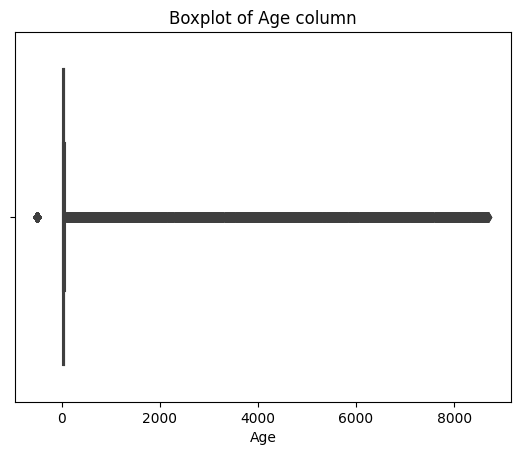

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


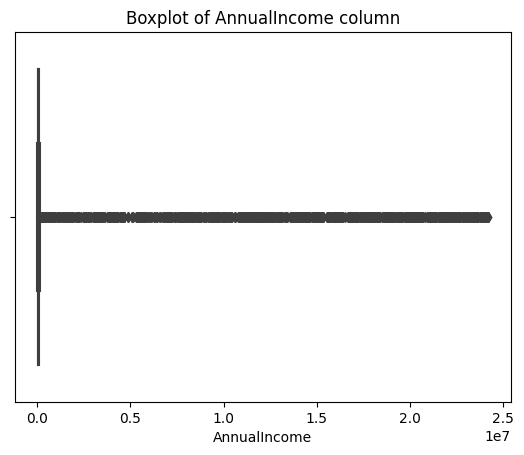

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


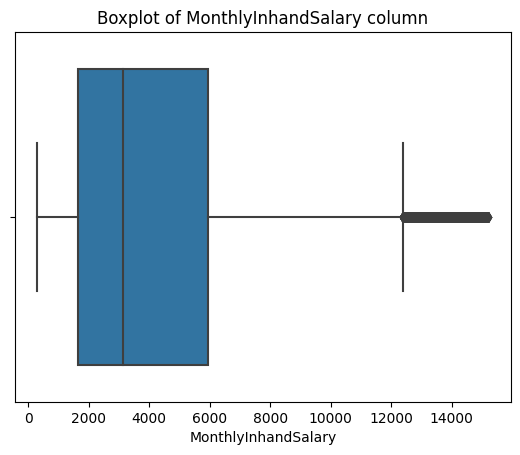

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


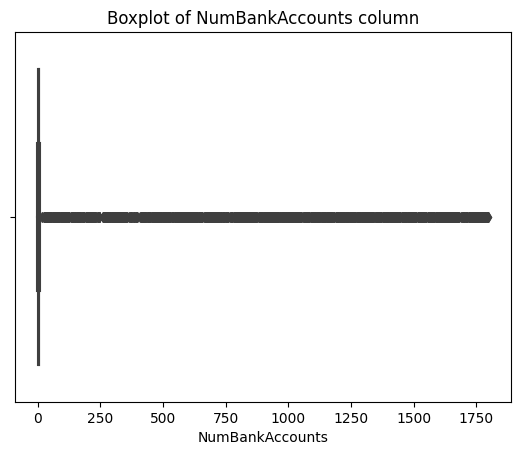

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


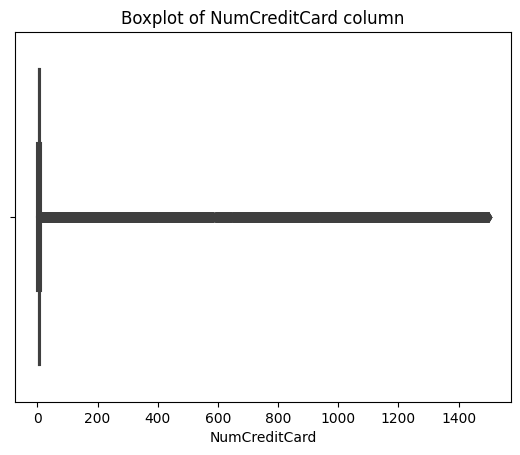

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


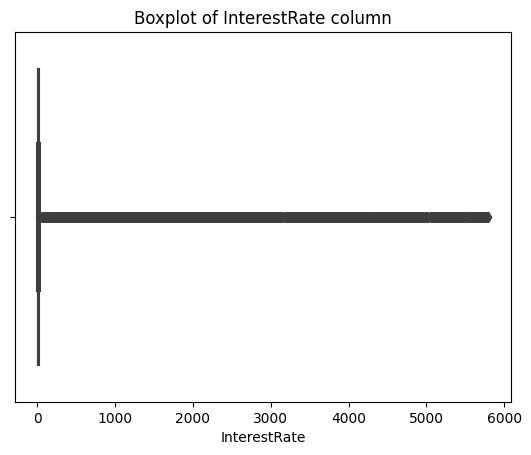

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


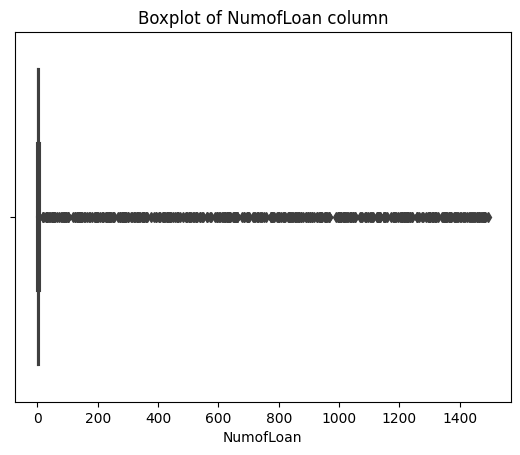

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


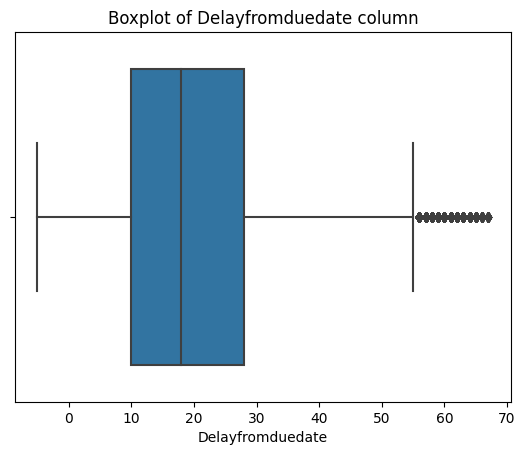

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


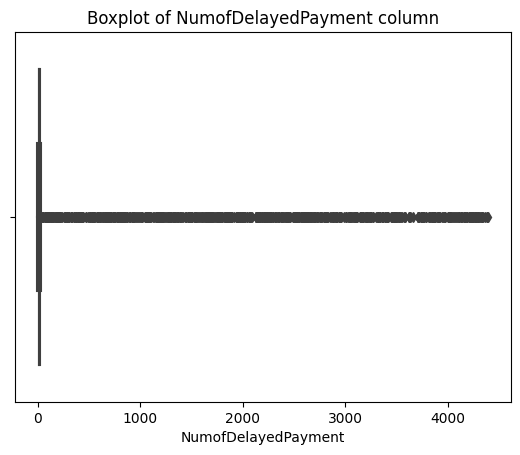

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


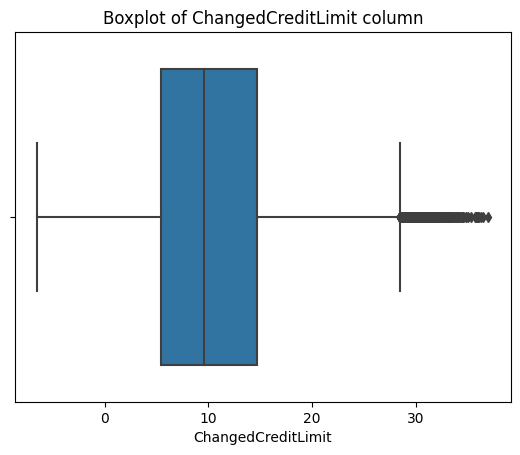

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


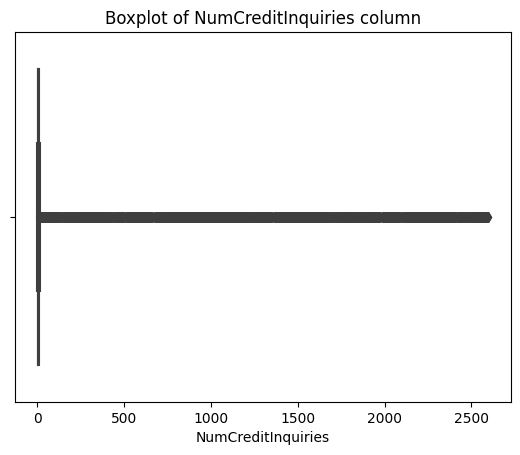

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


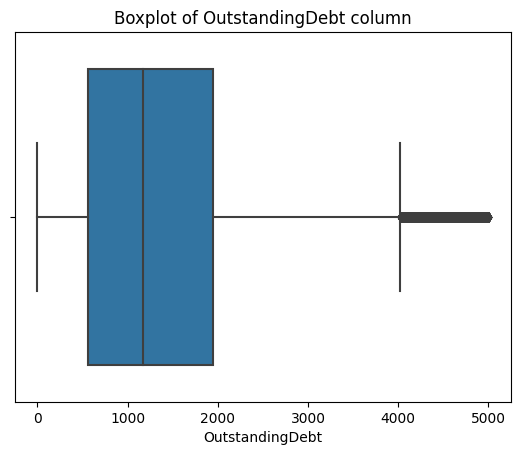

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


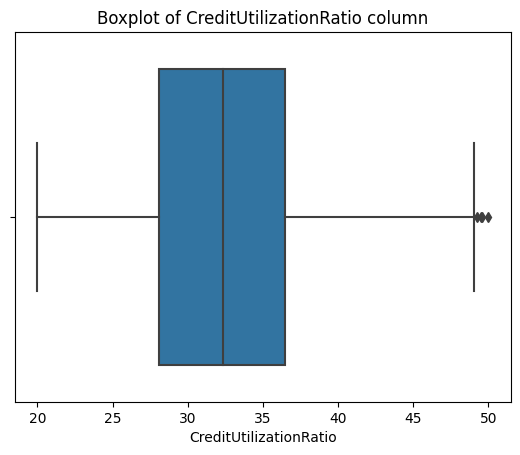

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


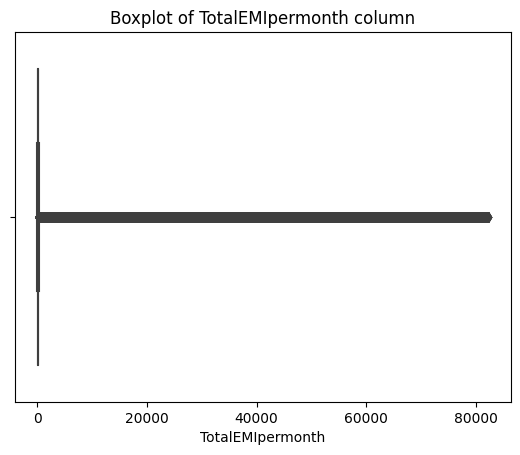

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


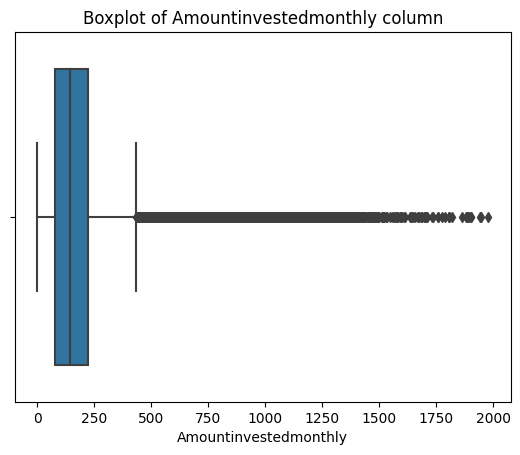

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


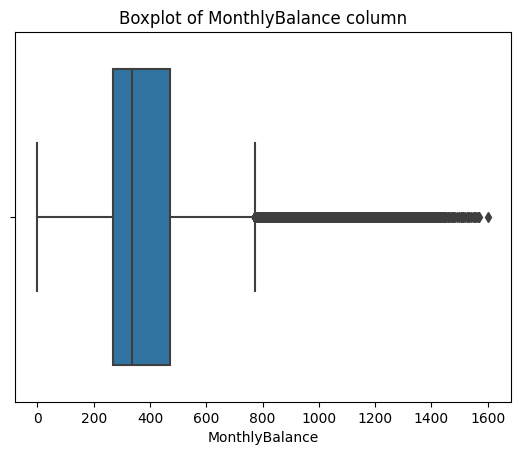

In [17]:
# outlier treatment 
for x in data.columns:
    if (data[x].dtype != object) and (x!='Score'):
        sns.boxplot(x= data[x], data=data)
        plt.title(f'Boxplot of {x} column')
        plt.show()

In [18]:
numeric_data = data.select_dtypes(exclude='object')

q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
IQR = q3 - q1

lower = np.maximum(0, q1 - 1.5*IQR)
upper = q3 + 1.5*IQR

In [19]:
lower

Age                       0.000
AnnualIncome              0.000
MonthlyInhandSalary       0.000
NumBankAccounts           0.000
NumCreditCard             0.000
InterestRate              0.000
NumofLoan                 0.000
Delayfromduedate          0.000
NumofDelayedPayment       0.000
ChangedCreditLimit        0.000
NumCreditInquiries        0.000
OutstandingDebt           0.000
CreditUtilizationRatio   15.404
TotalEMIpermonth          0.000
Amountinvestedmonthly     0.000
MonthlyBalance            0.000
Score                     0.000
dtype: float64

In [20]:
upper

Age                          69.000
AnnualIncome             153064.980
MonthlyInhandSalary       12391.405
NumBankAccounts              13.000
NumCreditCard                11.500
InterestRate                 38.000
NumofLoan                    11.000
Delayfromduedate             55.000
NumofDelayedPayment          31.500
ChangedCreditLimit           28.462
NumCreditInquiries           18.000
OutstandingDebt            4022.850
CreditUtilizationRatio       49.150
TotalEMIpermonth            357.834
Amountinvestedmonthly       434.385
MonthlyBalance              773.125
Score                         2.500
dtype: float64

In [21]:
data.describe()

,Age,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,TotalEMIpermonth,Amountinvestedmonthly,MonthlyBalance,Score
count,87495.000,87495.000,87495.000,87495.000,87495.000,87495.000,87495.000,87495.000,87495.000,87495.000,87495.000,87495.000,87495.000,87495.000,87495.000,87495.000,87495.000
mean,110.467,180240.415,4194.687,17.113,22.665,73.051,7.020,21.060,30.928,10.386,27.734,1426.717,32.291,1388.518,195.482,402.754,0.290
std,686.550,1455211.726,3140.984,117.429,129.807,467.727,60.352,14.865,221.658,6.705,191.121,1155.824,5.112,8248.832,190.373,213.417,0.454
min,-500.000,7005.930,303.645,-1.000,0.000,1.000,0.000,-5.000,-3.000,-6.490,0.000,0.230,20.000,0.000,0.000,0.008,0.000
25%,24.000,19433.480,1652.104,3.000,4.000,8.000,1.000,10.000,9.000,5.425,3.000,566.400,28.059,30.453,76.962,270.176,0.000
50%,33.000,37579.750,3135.827,6.000,5.000,13.000,3.000,18.000,14.000,9.560,6.000,1166.230,32.322,69.286,143.313,337.125,0.000
75%,42.000,72886.080,5947.825,7.000,7.000,20.000,5.000,28.000,18.000,14.640,9.000,1948.980,36.496,161.406,219.931,471.356,1.000
max,8698.000,24198062.000,15204.633,1798.000,1499.000,5797.000,1495.000,67.000,4397.000,36.970,2597.000,4998.070,50.000,82256.000,1977.326,1602.041,1.000


In [22]:
for x in data.columns:
    if (data[x].dtype != object):
        data[x] = np.where(data[x] < lower[x], lower[x], data[x])
        data[x] = np.where(data[x] > upper[x], upper[x], data[x])

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


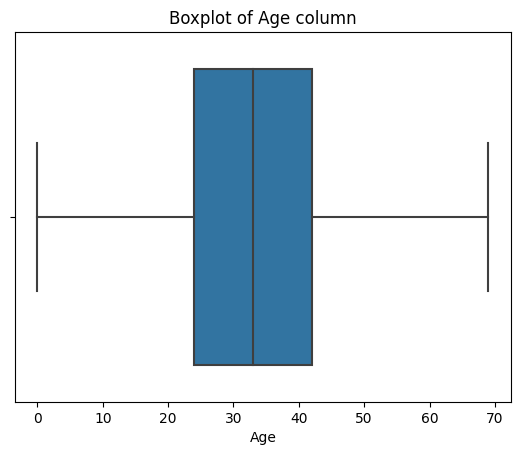

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


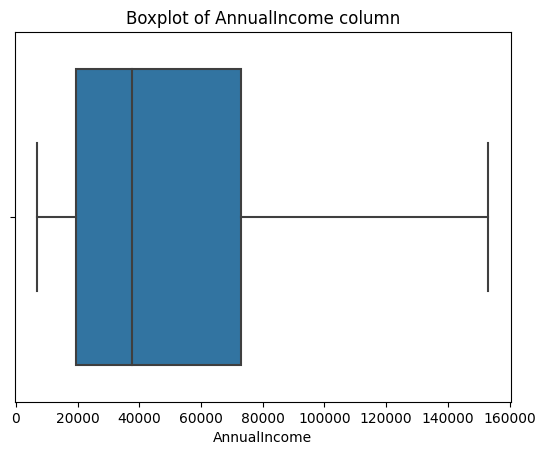

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


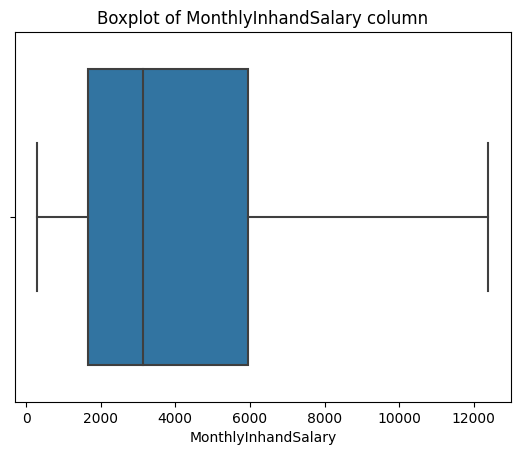

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


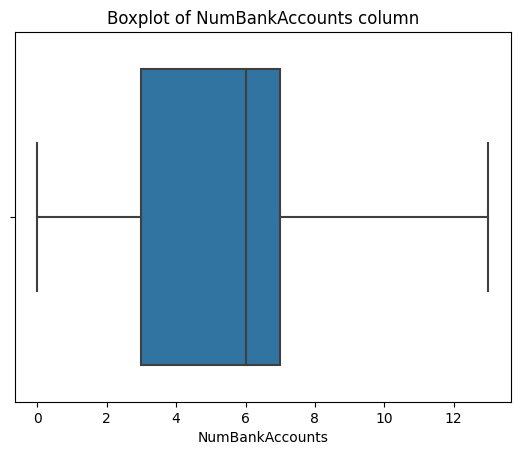

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


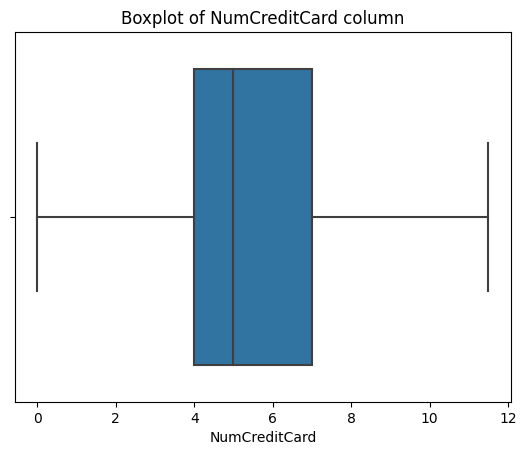

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


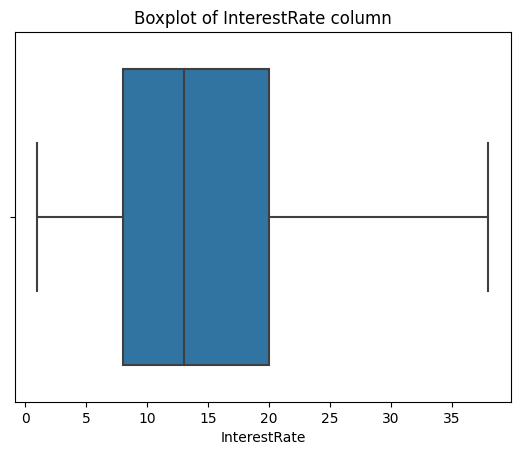

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


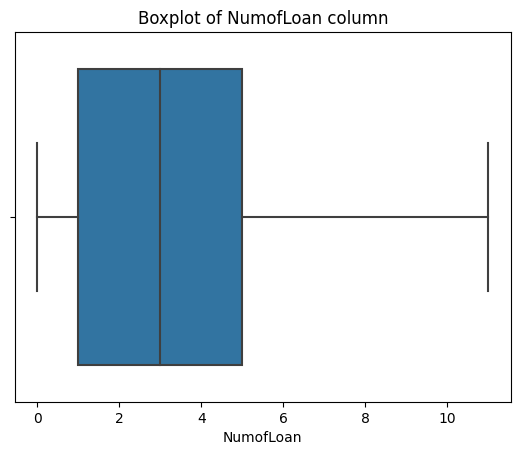

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


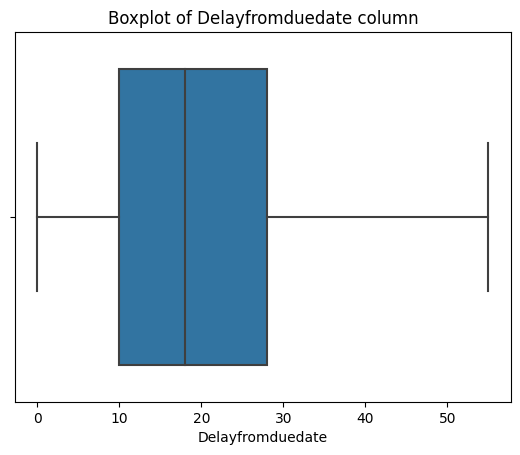

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


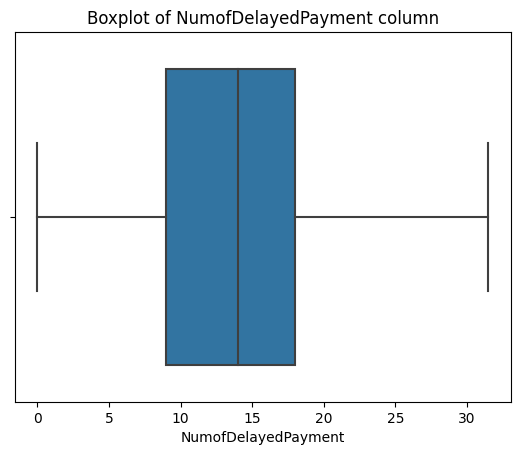

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


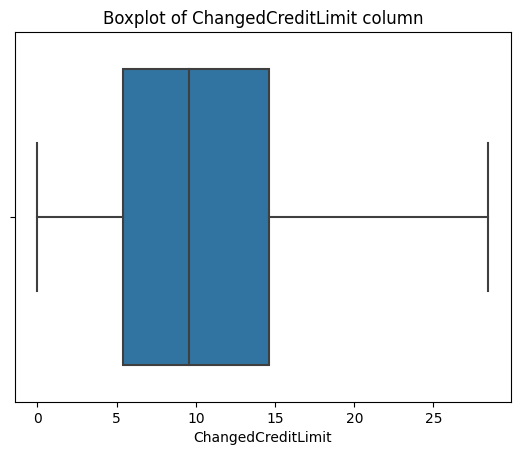

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


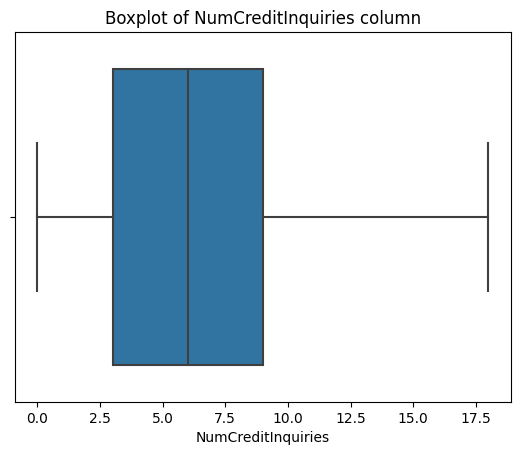

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


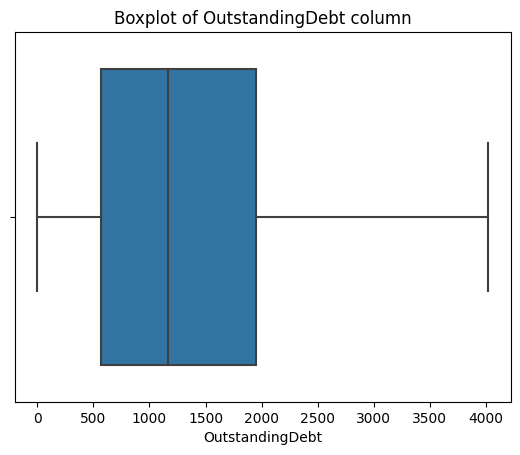

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


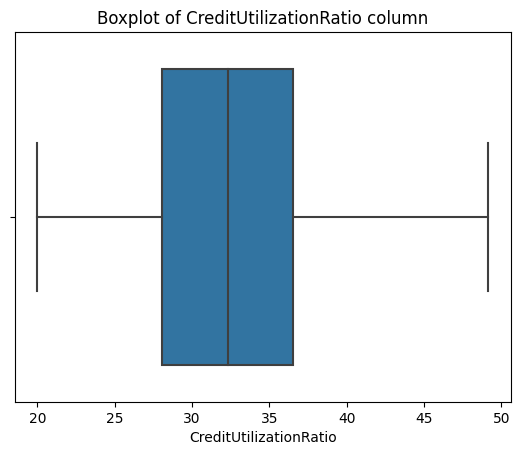

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


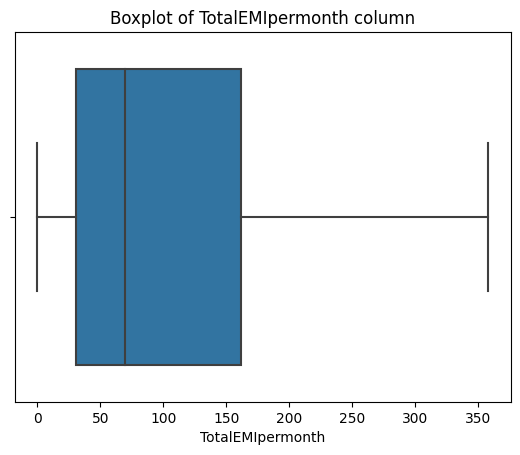

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


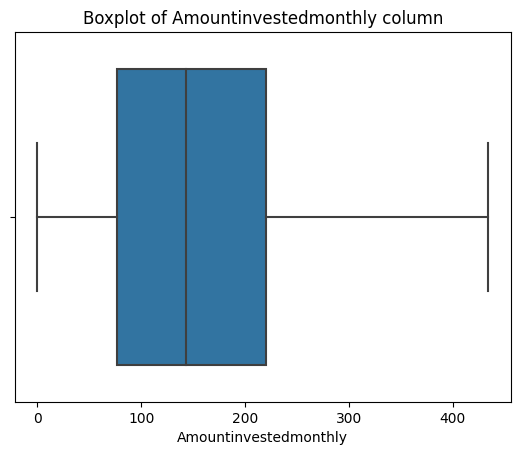

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


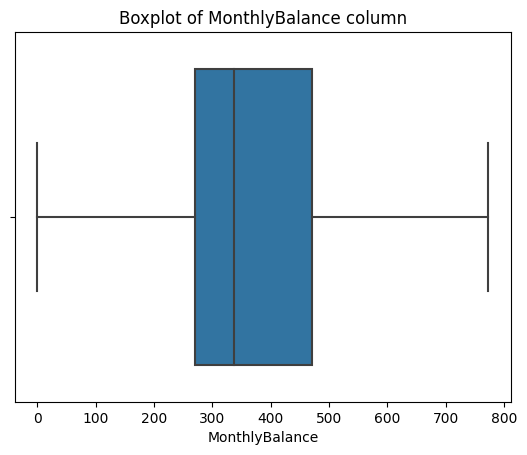

c:\Users\Shahbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


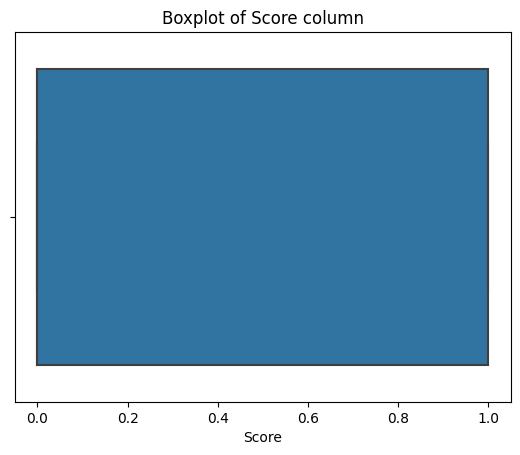

In [23]:
for x in data.columns:
    if data[x].dtype != object:
        sns.boxplot(data=data, x=data[x])
        plt.title(f"Boxplot of {x} column")
        plt.show()

In [24]:
# datada sutunlar uzre paylanma (normal or not normal distribution) yoxlanilir.
from scipy import stats

normal_distributed = []
not_normal_distributed = []

for x in data.columns:
    if data[x].dtype != object:
        ks_stat, ks_p_value = stats.kstest(data[x], cdf = 'norm')
        if ks_p_value> 0.05:
            normal_distributed.append(x)
        else:
            not_normal_distributed.append(x)

In [25]:
normal_distributed

[]

In [26]:
not_normal_distributed

['Age',
 'AnnualIncome',
 'MonthlyInhandSalary',
 'NumBankAccounts',
 'NumCreditCard',
 'InterestRate',
 'NumofLoan',
 'Delayfromduedate',
 'NumofDelayedPayment',
 'ChangedCreditLimit',
 'NumCreditInquiries',
 'OutstandingDebt',
 'CreditUtilizationRatio',
 'TotalEMIpermonth',
 'Amountinvestedmonthly',
 'MonthlyBalance',
 'Score']

In [27]:
# korrelasiya baxilir. 30%den yuxari target ile asili olan ve oz aralarinda 70% den ashaqi asili olan deyishenleri saxlayiriq
def correlation_check(data, target, target_threshold = 0.3, inter_threshold = 0.7):
    
    corr_matrix = data.corr(method='spearman', numeric_only=True)
    explaining_target = []
    not_explaining_target = []
    result = []
    
    for variable in corr_matrix.index:
            correlation = corr_matrix.loc[variable, target]
            if abs(correlation) > target_threshold:
                explaining_target.append(variable)
                
            else:
                not_explaining_target.append(variable)
    explaining_target.remove(target)
    
    # intercorrelation
    highly_correlated_variables = (np.abs(corr_matrix) > inter_threshold) & (corr_matrix != 1.0)
    independent_variable_pairs = np.where(highly_correlated_variables)
    correlated_pairs_set = set()
    
    for var1, var2 in zip(independent_variable_pairs[0], independent_variable_pairs[1]):
        if var1 < var2:
            correlated_pairs_set.add((corr_matrix.index[var1], corr_matrix.columns[var2]))
        else:
            correlated_pairs_set.add((corr_matrix.index[var2], corr_matrix.columns[var1]))
    result_intercorrelated_independent = pd.DataFrame(list(correlated_pairs_set), columns=['Variable 1', 'Variable 2'])
    
    for x in explaining_target:
        if (x not in result_intercorrelated_independent['Variable 1'].tolist()) and ((x not in result_intercorrelated_independent['Variable 2'].tolist())):
            result.append(x)
        continue
    
    return result

In [28]:
correlation_check(data, 'Score', 0.3, 0.7)

['NumCreditCard',
 'InterestRate',
 'Delayfromduedate',
 'NumCreditInquiries',
 'OutstandingDebt']

In [29]:
# korrelasiyadan qalan musteqil numeric deyishenler arasi asilliq yoxlanilir VIF ile

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_variance(data, columns):
    vif_data = data[columns]
    vif_values = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    vif_result = pd.DataFrame({
        'VIF':vif_values,
        'Columns':columns
    })
    return vif_result

calculate_variance(data,
    ['NumCreditCard',
    'InterestRate',
    'Delayfromduedate',
    'NumCreditInquiries',
    'OutstandingDebt'])

,VIF,Columns
0,5.558,NumCreditCard
1,6.402,InterestRate
2,5.483,Delayfromduedate
3,4.407,NumCreditInquiries
4,5.202,OutstandingDebt


In [30]:
categoric_columns = []
for x in data.columns:
    if data[x].dtype == object:
        categoric_columns.append(x)

In [31]:
# VIF-den 1-7 arasi alan numeric musteqil deyishenler saxlanilir diger numeric deyishenler drop edilir
vif_columns = ['NumCreditCard', 'InterestRate', 'Delayfromduedate', 'NumCreditInquiries', 'OutstandingDebt']
columns = vif_columns.copy()
# Append elements of categoric_columns to columns
columns.extend(categoric_columns)

In [32]:
columns

['NumCreditCard',
 'InterestRate',
 'Delayfromduedate',
 'NumCreditInquiries',
 'OutstandingDebt',
 'Month',
 'Occupation',
 'PaymentofMinAmount',
 'PaymentBehaviour']

In [33]:
data = data[['NumCreditCard',
 'InterestRate',
 'Delayfromduedate',
 'NumCreditInquiries',
 'OutstandingDebt',
 'Month',
 'Occupation',
 'PaymentofMinAmount',
 'PaymentBehaviour', 'Score']]

In [34]:
data.head()

,NumCreditCard,InterestRate,Delayfromduedate,NumCreditInquiries,OutstandingDebt,Month,Occupation,PaymentofMinAmount,PaymentBehaviour,Score
0,4.000,3.000,3.000,4.000,809.980,January,Scientist,No,HighspentSmallvaluepayments,0.000
1,4.000,3.000,0.000,4.000,809.980,February,Scientist,No,LowspentLargevaluepayments,0.000
2,4.000,3.000,3.000,4.000,809.980,March,Scientist,No,LowspentMediumvaluepayments,0.000
3,4.000,3.000,5.000,4.000,809.980,April,Scientist,No,LowspentSmallvaluepayments,0.000
4,4.000,3.000,6.000,4.000,809.980,May,Scientist,No,HighspentMediumvaluepayments,0.000


In [35]:
# qalan numeric ve categoric deyishenlerin  her biri uchun WoE transformation olunur

def woe_transformate(data):
    for var in data.columns[:-1]:
        if data[var].dtypes != object:
            q1 = data[var].quantile(0.25)
            q2 = data[var].quantile(0.5)
            q3 = data[var].quantile(0.75)
            
            ranges = [-np.inf, q1, q2, q3, np.inf]
            data['category_' + var] = pd.cut(data[var], bins=ranges, duplicates='drop')
            
            grouped = data.groupby(['category_' + var, 'Score'])['Score'].count().unstack().reset_index()
            
            grouped['positive_prop'] = grouped[0] / grouped[0].sum()
            grouped['negative_prop'] = grouped[1] / grouped[1].sum()
            
            grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
            
            grouped.rename(columns={'woe': var + '_woe'}, inplace=True)
            data = data.merge(grouped[['category_' + var, var + '_woe']], how='left', on='category_' + var)
            
            
        else:
            grouped = data.groupby([var, 'Score'])['Score'].count().unstack().reset_index()
            
            grouped['positive_prop'] = grouped[0] / grouped[0].sum()
            grouped['negative_prop'] = grouped[1] / grouped[1].sum()
            
            grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
            grouped.rename(columns={'woe':var+'_woe'}, inplace=True)
            data = data.merge(grouped[[var,var+'_woe']], how='left', on=var)

    return data

data = woe_transformate(data=data)
data_scored = data

C:\Users\Shahbaz\AppData\Local\Temp\ipykernel_18060\2882960570.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(['category_' + var, 'Score'])['Score'].count().unstack().reset_index()
C:\Users\Shahbaz\AppData\Local\Temp\ipykernel_18060\2882960570.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(['category_' + var, 'Score'])['Score'].count().unstack().reset_index()
C:\Users\Shahbaz\AppData\Local\Temp\ipykernel_18060\2882960570.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obs

C:\Users\Shahbaz\AppData\Local\Temp\ipykernel_18060\2882960570.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(['category_' + var, 'Score'])['Score'].count().unstack().reset_index()
C:\Users\Shahbaz\AppData\Local\Temp\ipykernel_18060\2882960570.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(['category_' + var, 'Score'])['Score'].count().unstack().reset_index()


In [36]:
data.head()

,NumCreditCard,InterestRate,Delayfromduedate,NumCreditInquiries,OutstandingDebt,Month,Occupation,PaymentofMinAmount,PaymentBehaviour,Score,category_NumCreditCard,NumCreditCard_woe,category_InterestRate,InterestRate_woe,category_Delayfromduedate,Delayfromduedate_woe,category_NumCreditInquiries,NumCreditInquiries_woe,category_OutstandingDebt,OutstandingDebt_woe,Month_woe,Occupation_woe,PaymentofMinAmount_woe,PaymentBehaviour_woe
0,4.000,3.000,3.000,4.000,809.980,January,Scientist,No,HighspentSmallvaluepayments,0.000,"(-inf, 4.0]",1.078,"(-inf, 8.0]",0.963,"(-inf, 10.0]",1.051,"(3.0, 6.0]",0.558,"(566.4, 1166.23]",1.210,0.013,-0.081,0.974,0.087
1,4.000,3.000,0.000,4.000,809.980,February,Scientist,No,LowspentLargevaluepayments,0.000,"(-inf, 4.0]",1.078,"(-inf, 8.0]",0.963,"(-inf, 10.0]",1.051,"(3.0, 6.0]",0.558,"(566.4, 1166.23]",1.210,0.031,-0.081,0.974,0.058
2,4.000,3.000,3.000,4.000,809.980,March,Scientist,No,LowspentMediumvaluepayments,0.000,"(-inf, 4.0]",1.078,"(-inf, 8.0]",0.963,"(-inf, 10.0]",1.051,"(3.0, 6.0]",0.558,"(566.4, 1166.23]",1.210,0.021,-0.081,0.974,-0.071
3,4.000,3.000,5.000,4.000,809.980,April,Scientist,No,LowspentSmallvaluepayments,0.000,"(-inf, 4.0]",1.078,"(-inf, 8.0]",0.963,"(-inf, 10.0]",1.051,"(3.0, 6.0]",0.558,"(566.4, 1166.23]",1.210,-0.018,-0.081,0.974,-0.316
4,4.000,3.000,6.000,4.000,809.980,May,Scientist,No,HighspentMediumvaluepayments,0.000,"(-inf, 4.0]",1.078,"(-inf, 8.0]",0.963,"(-inf, 10.0]",1.051,"(3.0, 6.0]",0.558,"(566.4, 1166.23]",1.210,-0.020,-0.081,0.974,0.183


In [37]:
# sonda sadece WoE transform olunmush musteqil deyishenler ve asili deyishen olan data-ni saxlayin
woe_features = data.filter(regex='_woe$', axis=1)
woe_features.columns

Index(['NumCreditCard_woe', 'InterestRate_woe', 'Delayfromduedate_woe', 'NumCreditInquiries_woe', 'OutstandingDebt_woe', 'Month_woe', 'Occupation_woe', 'PaymentofMinAmount_woe', 'PaymentBehaviour_woe'], dtype='object')

In [38]:
columns = woe_features.columns.tolist()

In [39]:
# musteqil ve asili deyishenleri sechin input ve output olaraq
X = data[woe_features.columns]
y = data['Score']

In [40]:
X.head()

,NumCreditCard_woe,InterestRate_woe,Delayfromduedate_woe,NumCreditInquiries_woe,OutstandingDebt_woe,Month_woe,Occupation_woe,PaymentofMinAmount_woe,PaymentBehaviour_woe
0,1.078,0.963,1.051,0.558,1.210,0.013,-0.081,0.974,0.087
1,1.078,0.963,1.051,0.558,1.210,0.031,-0.081,0.974,0.058
2,1.078,0.963,1.051,0.558,1.210,0.021,-0.081,0.974,-0.071
3,1.078,0.963,1.051,0.558,1.210,-0.018,-0.081,0.974,-0.316
4,1.078,0.963,1.051,0.558,1.210,-0.020,-0.081,0.974,0.183


# Modeling

In [41]:
# data train test bolgusu olunur, test_size=0.3 goturulur.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
# Confusion matrix, classification report ve gini hesablanacaq funksiya qurun 

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

def calculate_metrics(X_test, y_test, model):
    
    y_prob = model.predict_proba(X_test)[:,1]
    y_test_pred = model.predict(X_test)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Calculate classification report
    class_report = classification_report(y_test, y_test_pred)

    # Calculate Gini score
    roc_auc = roc_auc_score(y_test, y_prob)
    gini_score = 2*roc_auc-1
    print(roc_auc)
    print(gini_score)

    # Create a dictionary to store metrics
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"\nClassification Report:\n{class_report}")
    print(f"\nGini Score: {gini_score}")


In [43]:
# Logistic regression modeli qurulur
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()

In [44]:
log_reg_model.fit(X_test, y_test)

LogisticRegression()

In [45]:
# Funksiya vasitesile oyrenmish modelin neticelerine baxin ( Gini, confusion matrix ve clf report)
calculate_metrics(X_test, y_test, log_reg_model)

0.7903623083433653
0.5807246166867306
Confusion Matrix:
[[16039  2557]
 [ 3333  4320]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84     18596
         1.0       0.63      0.56      0.59      7653

    accuracy                           0.78     26249
   macro avg       0.73      0.71      0.72     26249
weighted avg       0.77      0.78      0.77     26249


Gini Score: 0.5807246166867306


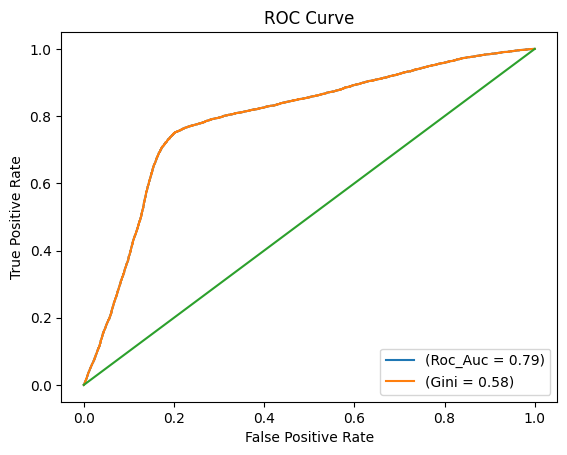

In [46]:
# Alinmish gini score uchun roc curve qrafiki yaradin.
from sklearn.metrics import roc_curve

y_prob = log_reg_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

In [47]:
X_test.columns

Index(['NumCreditCard_woe', 'InterestRate_woe', 'Delayfromduedate_woe', 'NumCreditInquiries_woe', 'OutstandingDebt_woe', 'Month_woe', 'Occupation_woe', 'PaymentofMinAmount_woe', 'PaymentBehaviour_woe'], dtype='object')

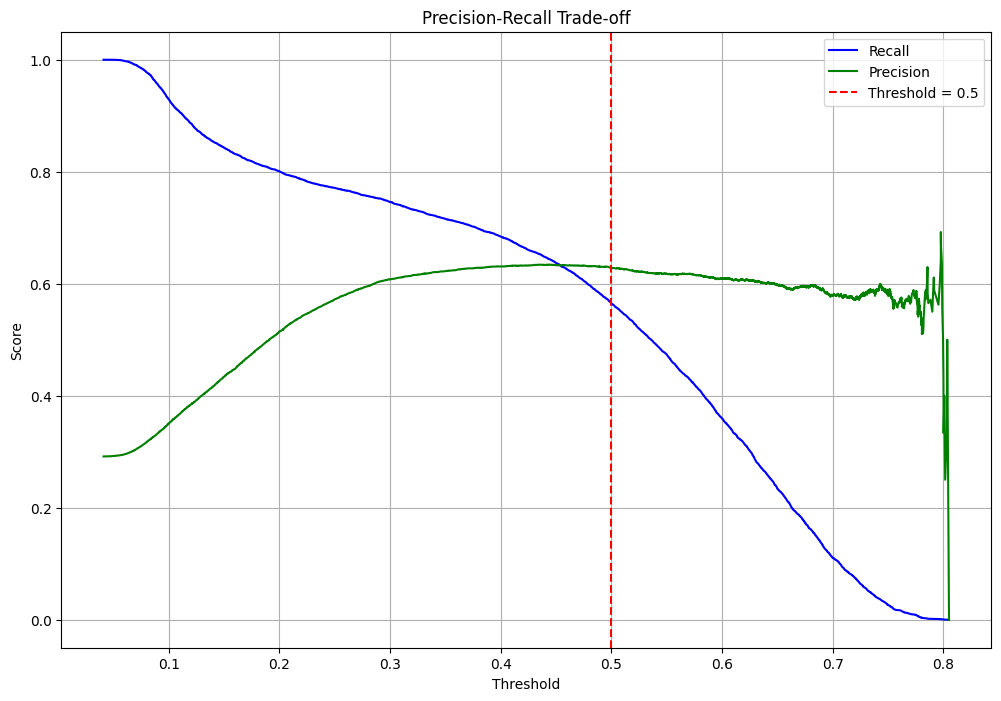

In [48]:
# Precision ve Recall kesishme noqtelerine qrafik ile baxin

from sklearn.metrics import precision_recall_curve

y_prob = log_reg_model.predict_proba(X_test)[:,1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(12, 8))
plt.plot(thresholds, recall[:-1], label='Recall', color='blue')
plt.plot(thresholds, precision[:-1], label='Precision', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Trade-off')
plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.legend()
plt.grid(True)
plt.show()

# Univariate analysis of Gini

In [49]:
# Her bir variable uchun Gini deyerini train ve test uzre gosterin
variables = []
train_gini_scores = []
test_gini_scores = []

for i in X_train.columns:
    X_train_single_var = X_train[[i]]
    X_test_single_var = X_test[[i]]
    log_reg_model.fit(X_train_single_var, y_train)
    
    y_pred_train_single_var = log_reg_model.predict_proba(X_train_single_var)[:, 1]

    train_roc = roc_auc_score(y_train, y_pred_train_single_var)
    train_gini = 2 * train_roc - 1

    
    y_pred_test_single_var = log_reg_model.predict_proba(X_test_single_var)[:, 1]

    test_roc = roc_auc_score(y_test, y_pred_test_single_var)
    test_gini = 2 * test_roc - 1


    variables.append(i)
    train_gini_scores.append(train_gini)
    test_gini_scores.append(test_gini)
    
results_df = pd.DataFrame({
                            'Variable': variables,
                            'Train Gini': train_gini_scores,
                            'Test Gini': test_gini_scores
                        })

results_df_sorted = results_df.sort_values(by='Test Gini', ascending=False, ignore_index=True)

results_df_sorted

,Variable,Train Gini,Test Gini
0,OutstandingDebt_woe,0.515,0.512
1,InterestRate_woe,0.500,0.501
2,NumCreditInquiries_woe,0.446,0.438
3,Delayfromduedate_woe,0.423,0.403
4,NumCreditCard_woe,0.388,0.375
5,PaymentofMinAmount_woe,0.304,0.298
6,PaymentBehaviour_woe,0.131,0.126
7,Occupation_woe,0.032,0.043
8,Month_woe,0.011,0.012


# Secilmish variable-lar ile yeni model

In [50]:
# Univariate analysisde test uzre GINI deyeri 40 faizden yuxari olan deyishenler saxlanilaraq yeni model qurulur
keeped_columns = [x for x in results_df_sorted.loc[results_df_sorted['Test Gini']>0.4, 'Variable']]

In [51]:
data2 = X[keeped_columns]
X_train,X_test, y_train, y_test = train_test_split(data2, y, test_size = 0.3, random_state = 42)

In [52]:
log_reg2 = LogisticRegression()
log_reg2.fit(X_train, y_train)

LogisticRegression()

In [53]:
X_train.head()

,OutstandingDebt_woe,InterestRate_woe,NumCreditInquiries_woe,Delayfromduedate_woe
7654,-0.352,1.149,0.558,1.051
6720,-1.223,-1.376,-0.476,-1.095
16607,-0.352,-1.376,-0.476,-0.101
37731,1.210,-0.028,-0.476,-0.101
34915,1.272,0.963,1.103,0.497


In [54]:
calculate_metrics(X_test, y_test, log_reg2)

0.7797169160890965
0.5594338321781931
Confusion Matrix:
[[15949  2647]
 [ 3207  4446]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84     18596
         1.0       0.63      0.58      0.60      7653

    accuracy                           0.78     26249
   macro avg       0.73      0.72      0.72     26249
weighted avg       0.77      0.78      0.77     26249


Gini Score: 0.5594338321781931


In [55]:
import joblib

joblib.dump(log_reg2, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

# Deployment with woe

In [56]:
# Verilmish test_data_woe uchun modeli deploy edin.
model_columns = X_train.columns.tolist()

In [57]:
deploy_woe_data = pd.read_excel(r'C:\Users\Shahbaz\Desktop\socool\teacher scripts\Lesson 16\test_data_with_woe.xlsx')
deploy_woe_data.head()

,Customer_ID,OutstandingDebt_woe,InterestRate_woe,NumCreditInquiries_woe,Delayfromduedate_woe
0,0,-1.223,-1.376,-0.476,-1.095
1,1,1.272,1.149,1.103,1.051
2,2,-1.223,-1.376,-0.476,-1.095
3,3,-0.352,-0.028,0.558,0.497
4,4,-1.223,-0.028,-0.476,-0.101


In [58]:
X_deploy_woe = deploy_woe_data[model_columns]

In [59]:
X_deploy_woe.head()

,OutstandingDebt_woe,InterestRate_woe,NumCreditInquiries_woe,Delayfromduedate_woe
0,-1.223,-1.376,-0.476,-1.095
1,1.272,1.149,1.103,1.051
2,-1.223,-1.376,-0.476,-1.095
3,-0.352,-0.028,0.558,0.497
4,-1.223,-0.028,-0.476,-0.101


In [60]:
# model.predict_proba() vasitesile mushterilerin default etme ehtimalini gosterin (PD)
y_deploy_woe_proba = log_reg2.predict_proba(X_deploy_woe)[:,1]

In [61]:
y_deploy_woe_proba = ["{:.3f}".format(value) for value in y_deploy_woe_proba]

In [62]:
deploy_woe_data['Probability of Default'] = y_deploy_woe_proba

In [63]:
deploy_woe_data.head()

,Customer_ID,OutstandingDebt_woe,InterestRate_woe,NumCreditInquiries_woe,Delayfromduedate_woe,Probability of Default
0,0,-1.223,-1.376,-0.476,-1.095,0.680
1,1,1.272,1.149,1.103,1.051,0.068
2,2,-1.223,-1.376,-0.476,-1.095,0.680
3,3,-0.352,-0.028,0.558,0.497,0.270
4,4,-1.223,-0.028,-0.476,-0.101,0.473


In [64]:
deploy_woe_data.to_excel(r"C:\Users\Shahbaz\Desktop\socool\teacher scripts\Lesson 16\probability_of_defaults_with_woe.xlsx")

# Deployment with real values (homework)

In [65]:
# Verilmish test_data_real_values.xlsx uchun modeli deploy edin.
test_data_real_values = pd.read_excel(r"C:\Users\Shahbaz\Desktop\socool\teacher scripts\Lesson 16\test_data_real_values.xlsx")
test_data_real_values.head()

,OutstandingDebt,InterestRate,NumCreditInquiries,Delayfromduedate,CustomerID
0,632.930,17,0,20,53115
1,3259.170,24,11,53,35538
2,2313.600,22,11,55,15150
3,556.850,16,8,23,65145
4,1115.060,6,3,16,23224


In [66]:
model_columns

['OutstandingDebt_woe',
 'InterestRate_woe',
 'NumCreditInquiries_woe',
 'Delayfromduedate_woe']

In [67]:
deploy_real_data = test_data_real_values[[x[:-4] for x in model_columns]] # to cut '_woe' part
deploy_real_data.head()

,OutstandingDebt,InterestRate,NumCreditInquiries,Delayfromduedate
0,632.930,17,0,20
1,3259.170,24,11,53
2,2313.600,22,11,55
3,556.850,16,8,23
4,1115.060,6,3,16


In [68]:
data_scored.head(2)

,NumCreditCard,InterestRate,Delayfromduedate,NumCreditInquiries,OutstandingDebt,Month,Occupation,PaymentofMinAmount,PaymentBehaviour,Score,category_NumCreditCard,NumCreditCard_woe,category_InterestRate,InterestRate_woe,category_Delayfromduedate,Delayfromduedate_woe,category_NumCreditInquiries,NumCreditInquiries_woe,category_OutstandingDebt,OutstandingDebt_woe,Month_woe,Occupation_woe,PaymentofMinAmount_woe,PaymentBehaviour_woe
0,4.000,3.000,3.000,4.000,809.980,January,Scientist,No,HighspentSmallvaluepayments,0.000,"(-inf, 4.0]",1.078,"(-inf, 8.0]",0.963,"(-inf, 10.0]",1.051,"(3.0, 6.0]",0.558,"(566.4, 1166.23]",1.210,0.013,-0.081,0.974,0.087
1,4.000,3.000,0.000,4.000,809.980,February,Scientist,No,LowspentLargevaluepayments,0.000,"(-inf, 4.0]",1.078,"(-inf, 8.0]",0.963,"(-inf, 10.0]",1.051,"(3.0, 6.0]",0.558,"(566.4, 1166.23]",1.210,0.031,-0.081,0.974,0.058


In [69]:
for x in deploy_real_data.columns:
    deploy_real_data[x+'_woe'] = pd.merge(deploy_real_data[x], data_scored[[x, x+'_woe']], how='left', on=x)[x+'_woe']


In [70]:
deploy_real_data.head(10)

,OutstandingDebt,InterestRate,NumCreditInquiries,Delayfromduedate,OutstandingDebt_woe,InterestRate_woe,NumCreditInquiries_woe,Delayfromduedate_woe
0,632.930,17,0,20,1.210,-0.028,1.103,-0.101
1,3259.170,24,11,53,1.210,-0.028,1.103,-0.101
2,2313.600,22,11,55,1.210,-0.028,1.103,-0.101
3,556.850,16,8,23,1.210,-0.028,1.103,-0.101
4,1115.060,6,3,16,1.210,-0.028,1.103,-0.101
5,670.360,13,6,7,1.210,-0.028,1.103,-0.101
6,1164.890,13,2,17,1.210,-0.028,1.103,-0.101
7,1462.530,20,10,22,1.210,-0.028,1.103,-0.101
8,1052.870,12,4,13,-1.223,-0.028,1.103,-0.101
9,2600.880,17,11,27,-1.223,-0.028,1.103,-0.101


In [71]:
deploy_real_data_woe = deploy_real_data[model_columns]

In [72]:
y_pred_real_data = log_reg2.predict_proba(deploy_real_data_woe)[:,1]

In [73]:
test_data_real_values['Probability'] = ['{:.3f}'.format(x) for x in y_pred_real_data]

In [74]:
# verilmish test datasinda mushterilerin default etme ehtimalini gosterin (PD)

In [75]:
test_data_real_values.head(10)

,OutstandingDebt,InterestRate,NumCreditInquiries,Delayfromduedate,CustomerID,Probability
0,632.930,17,0,20,53115,0.148
1,3259.170,24,11,53,35538,0.148
2,2313.600,22,11,55,15150,0.148
3,556.850,16,8,23,65145,0.148
4,1115.060,6,3,16,23224,0.148
5,670.360,13,6,7,45282,0.148
6,1164.890,13,2,17,69881,0.148
7,1462.530,20,10,22,48710,0.148
8,1052.870,12,4,13,67329,0.369
9,2600.880,17,11,27,12179,0.369


In [76]:
test_data_real_values.to_excel(r'C:\Users\Shahbaz\Desktop\socool\teacher scripts\Lesson 16\probability_of_defaults_with_real.xlsx')